# Deep Learning Tutorials
---
<img src="https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto/gigs/75648476/original/f303394129c0b6352c43235b6fae39b522b1dfb8/do-regression-classification-or-machine-learning-modelling.png" alt="Drawing" style="width:600px;"/>

Syllabus
---
1. Machine Learning Basic 
2. CNN, Transfer Learning
3. RNN & LSTM, training technique & Tensorboard
4. Detection & Segmentation ( Yolo2 )
5. Reinforcement Learning ( DQN & gym )
6. Reinforcement Learning ( A3C )
7. Generative Model ( Auto-encoder & GAN & DCGAN )
8. Jetson TX2 setup & Test TensorRT
9. Paper Review


Machine Learning Basic
---
<img src="https://www.marketsimplified.com/wp-content/uploads/2017/04/AIML.png" alt="Drawing" style="width:600px;"/>

<img src="https://image.slidesharecdn.com/eventclassificationpredictionusingsupportvectormachine-160405104743/95/event-classification-prediction-using-support-vector-machine-4-638.jpg?cb=1459853447" alt="Drawing" style="width:600px;"/>


Today's Contents
---
1. PyTorch Tutorial with Linear Regression
2. Classificaion
3. SVM
4. Multi-layer Neural Network


Reference
---
- [Deep Learning Book, Ian Goodfellow - Ch5 Machine Learning Basics](http://www.deeplearningbook.org/)
- [Pattern Recognition and Machine Learning, Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
- [자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다, 하용호](https://www.slideshare.net/yongho/ss-79607172)
- [Andrew Ng holehouse Deep Learning Lecture Note](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)
- [Andrew Ng UFLDL Tutorial](http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/)
- [PyTorch github](https://github.com/pytorch/examples)
- [Choosing a Machine Learning Framework in 2018](https://agi.io/2018/02/09/survey-machine-learning-frameworks/)

Linear Regression (PyTorch Tutorial)
---
<img src="https://cdn-images-1.medium.com/max/1600/1*eLfDr8eXnYKY-VELQXmnSg.png" alt="Drawing" style="width: 500px;"/>

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 \end{align}

\begin{align} h_\theta(x_i) = \theta^Tx_i + b \end{align}

\begin{align} \theta^* = \arg\min_\theta J(\theta) \end{align}

In [43]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x_train = [[1.0], [2.0], [3.0], [4.0], [5.0]]
y_correct = [[2.0], [4.0], [6.0], [7.0], [9.0]]

class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

epoch 0, loss 90.15652465820312
epoch 1, loss 52.56580352783203
epoch 2, loss 30.659780502319336
epoch 3, loss 17.894025802612305
epoch 4, loss 10.454758644104004
epoch 5, loss 6.119511127471924
epoch 6, loss 3.5931284427642822
epoch 7, loss 2.1208648681640625
epoch 8, loss 1.2628906965255737
epoch 9, loss 0.7628918886184692
epoch 10, loss 0.47150492668151855
epoch 11, loss 0.30168595910072327
epoch 12, loss 0.20271141827106476
epoch 13, loss 0.1450212150812149
epoch 14, loss 0.11138981580734253
epoch 15, loss 0.09177853912115097
epoch 16, loss 0.08033778518438339
epoch 17, loss 0.07365839928388596
epoch 18, loss 0.06975377351045609
epoch 19, loss 0.067466139793396


/opt/conda/envs/pytorch-py3.5.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


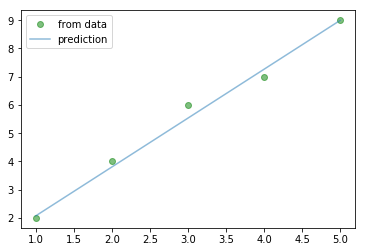

OrderedDict([('linear.weight', tensor([[1.7305]])), ('linear.bias', tensor([0.3433]))])


In [55]:
# Define model
model = LinearRegressionModel(1, 1)

criterion = torch.nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

epochs = 20
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(x_train))
    labels = torch.autograd.Variable(torch.Tensor(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()

    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

predicted = model.forward(torch.autograd.Variable(torch.Tensor(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

Gradient Descent
---
<img src="https://www.safaribooksonline.com/library/view/deep-learning/9781491924570/assets/dpln_0109.png" alt="Drawing" style="width: 700px;"/>

\begin{align} \theta^\prime = \theta - \eta \nabla J(\theta) \end{align}

### Stochastic Gradient Descent

<img src="https://image.slidesharecdn.com/random-170910154045/95/-40-638.jpg?cb=1505089848" alt="Drawing" style="width: 700px;"/>

### Other Methods

<img src="https://www.neuraldesigner.com/images/blog/gradient_descent_graph_big.png" alt="Drawing" style="width: 700px;"/>

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Drawing" style="width: 500px;"/>

<img src="https://image.slidesharecdn.com/random-170910154045/95/-49-638.jpg?cb=1505089848
" alt="Drawing" style="width: 700px;"/>



Regularization
---
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png" alt="Drawing" style="width: 700px;"/>

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 + \lambda ||\theta||^2 \end{align}

\begin{align} h_\theta(x_i) = \theta^Tx_i + b \end{align}

\begin{align} \theta^* = \arg\min_\theta J(\theta) \end{align}


In [41]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x_train = [[1.0], [2.0], [3.0], [4.0], [5.0]]
y_correct = [[2.0], [4.0], [6.0], [7.0], [9.0]]

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()

def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y

class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

Classification - SVM (Support Vector Machine)
---

![](http://dblab.xmu.edu.cn/blog/wp-content/uploads/2016/12/svm-400x400.png)
\begin{align}\min ||w||^2 \end{align}

\begin{align}y_i(w^Tx_i+b) \geq 1\end{align}

\begin{align} min \textit{L}_p(W,b,\alpha) = \frac{1}{2}||w||^2 - \sum\alpha_i[y_i(w^Tx_i+b)-1] \end{align}

\begin{align} \alpha_i[y_i(w^Tx_i+b)-1] = 0 \end{align}

\begin{align} y = sgn(w^{*T}x+b^*) \end{align}

\begin{align} y = sgn(\sum\alpha^*_iy_ix_i^Tx_i+b^*) \end{align}

![](https://www.researchgate.net/profile/M_Sayed_Mouchaweh/publication/278488437/figure/fig1/AS:328658981015552@1455369815377/Example-of-two-non-linearly-separable-classes-in-two-dimensional-feature-space.png)

![](https://image.slidesharecdn.com/eventclassificationpredictionusingsupportvectormachine-160405104743/95/event-classification-prediction-using-support-vector-machine-17-638.jpg?cb=1459853447)

(Reference: [Albert Orriols-Puig Slide Note, Lecture12 - SVM](https://www.slideshare.net/aorriols/lecture12-svm))

Neural Network
---

\begin{align} y = f(w^T\phi(x)) \end{align}


## Perceptron Rule

\begin{align} y = sgn(w^{*T}x+b^*) \end{align}

\begin{align} E_p(w) = -\sum y_iw^Tx_i \end{align}

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png?x31195" alt="Drawing" style="width: 500px;"/>

Information Theory
---
- Likely events should have low information content, and in the extreme case, events that are guaranteed to happen should have no information content what so ever.
- Less likely events should have higher information content.
- Independent events should have additive information.

\begin{align} I(X) = -logP(X) \end{align}

### Shannon's Entropy

\begin{align} H(X) = E_{x \sim P}[I(X)] \end{align}

<img src="https://i.imgur.com/Pynf9sG.png" alt="Drawing" style="width: 200px;"/>


### Kullback-Leibler divergence, KLD

두 확률분포의 차이를 계산하는 데 사용하는 함수. 가지고 있는 데이터의 분포 P(x)와 모델이 추정한 데이터의 분포 Q(x) 간의 차이

\begin{align} D_{KL}(P||Q) = E_{x \sim P}[\log\frac{P(X)}{Q(X)}] \end{align}


### Cross-Entropy

\begin{align} H(P,Q) = H(P) + D_{KL}(P||Q) \end{align}

\begin{align} H(P,Q) = E_{x \sim P}[\log Q(X)] \end{align}



Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


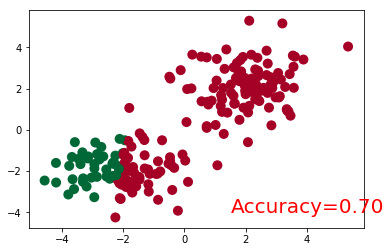

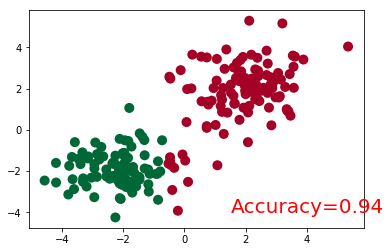

In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x),1)      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()